In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [7]:
path='/Users/fernandosangerman/experimentos/experimentos covid'

In [3]:
def cleanandgraph(T,Experimento):
    R=len(T)
    C=len(T.columns)
    Valores=T.iloc[[6,13,9,7],0:2].copy()
    ColVal=['Variable','Valor']
    Valores.columns=ColVal
    T_=T.iloc[27:R,1:C]
    newcols=T.iloc[26,1:C]
    NC=newcols.values.tolist()
    T_.columns=NC

    tics=192
    dia=0
    Li=[tics]
    dias=[dia]
    while tics<R-192:
        tics=tics+192
        dia=dia+1
        Li.append(tics)
        dias.append(dia)

    Tfinal=T_.iloc[Li].copy()
    del T
    Tfinal.insert(0,'dias',dias)
    
    Nexp=int((len(E6.columns)-1)/9)
    
    
    ColExp=['Exp '+str(n) for n in range(25)]
    Infectados=Tfinal['count personas with [infectado? ]'].copy()
    Infectados.columns=ColExp
    Infectados.insert(0,'dias',dias)

    Cuarentena=Tfinal['count personas with [cuarentena? = true]'].copy()
    Cuarentena.columns=ColExp
    Cuarentena.insert(0,'dias',dias)

    PInfectados=Tfinal['count personas with [infectado? ]'].mean(axis=1)
    PCuarentena=Tfinal['count personas with [cuarentena? = true]'].mean(axis=1)


    
    Tfinal.insert(1,'Promedio Infectados',PInfectados)
    Tfinal.insert(2,'Promedio Cuarentena',PCuarentena)
    
    print('Valores utilizados')
    print(Valores)

    
    x=0.5+np.arange(25)    
    y=Tfinal['count personas with [infectado? ]'].mean(axis=0).round().tolist()
    print("Promedio total=")
    print(round(sum(y)/len(y)))
    GM=round(sum(y)/len(y))

    fig, ax = plt.subplots()
    ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
    ax.set(xlim=(0, 25), xticks=np.arange(1, 25),
           ylim=(0, max(y)+1), yticks=np.arange(1, max(y)+1))
    ax.set_title('Promedio de infectados por corrida')
    ax.set_ylabel("Infectados")
    ax.set_xlabel("Corrida")
    #plt.savefig("Promedio de infectados por corrida"+str(Experimento)+".png")
    plt.show()
    
    
    #plt1=Infectados.plot(x='dias',y=ColExp,title='Infectados de todas las simulaciones contra el tiempo')
    #plt1.set_ylabel("Infectados")
    
    
    #plt2=Cuarentena.plot(x='dias',y=ColExp,title='Individuos en cuarentena de todas las simulaciones contra el tiempo')
    #plt2.set_ylabel("Personas en cuarentena")
    
    plt3=Tfinal.plot(x='dias',y='Promedio Infectados',
                     title='Promedio de los infectados de todas las simulaciones contra el tiempo')
    plt3.set_ylabel("Infectados")
    #plt3.savefig("Promedio de infectados de todas las simulaciones contra el tiempo"+str(Experimento)+".jpg")



    
    plt4=Tfinal.plot(x='dias',y='Promedio Cuarentena',
                     title='Promedio de los individuos en cuarentena de todas las simulaciones contra el tiempo')
    plt4.set_ylabel("Personas en cuarentena")


    return 
    


In [4]:
def ubicaciones(T):
    R=len(T)
    C=len(T.columns)
    Valores=T.iloc[[6,13,9,7],0:2].copy()
    ColVal=['Variable','Valor']
    Valores.columns=ColVal
    est=T.iloc[21:25]    
    newcols=T.iloc[26,:C]
    NC=newcols.values.tolist()
    est.columns=NC
    salones=est['infectadossalones'].iloc[2].mean()
    pasillo=est['infectadospasillo'].iloc[2].mean()
    biblioteca=est['infectadosbiblioteca'].iloc[2].mean()
    comedor=est['infectadoscomedor'].iloc[2].mean()
    gimnasio=est['infectadosgimnasio'].iloc[2].mean()
    casa=est['infectadoscasa'].iloc[2].mean()
    
    total=salones+pasillo+biblioteca+comedor+gimnasio+casa
    
    sizes=[salones/total*100+pasillo/total*100+biblioteca/total*100,comedor/total*100,gimnasio/total*100,casa/total*100]
    print(sizes)
    labels = 'Salones, Pasillo y Biblioteca', 'Comedor', 'Gimnasio', 'Casa'
    
    explode = (0, 0, 0, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()


In [5]:
def GM(T):
    R=len(T)
    C=len(T.columns)
    Valores=T.iloc[[6,13,9,7],0:2].copy()
    ColVal=['Variable','Valor']
    Valores.columns=ColVal
    T_=T.iloc[27:R,1:C]
    newcols=T.iloc[26,1:C]
    NC=newcols.values.tolist()
    T_.columns=NC

    tics=192
    Li=[tics]
    while tics<R-192:
        tics=tics+192
        Li.append(tics)
    
    Tfinal=T_.iloc[Li].copy()
    del T
        
    
    y=Tfinal['count personas with [infectado? ]'].mean(axis=0)
    
    GM=round(y.mean())
    SD=y.sem()
    return GM , SD

In [8]:
E6=pd.read_excel(path+'/exp6.xlsx')

In [9]:
E7=pd.read_excel(path+'/exp7.xlsx')

In [10]:
E8=pd.read_excel(path+'/exp8.xlsx')

In [11]:
E11=pd.read_excel(path+'/exp11.xlsx')

In [12]:
E12=pd.read_excel(path+'/exp12.xlsx')

In [13]:
E13=pd.read_excel(path+'/exp13.xlsx')

In [14]:
E14=pd.read_excel(path+'/exp14.xlsx')

In [15]:
E15=pd.read_excel(path+'/exp15.xlsx')

In [16]:
E16=pd.read_excel(path+'/exp16.xlsx')

Valores utilizados
               Variable Valor
6             inmunidad   180
13  tiempo-recuperacion     7
9        inmunesinicial     0
7         asintomaticos  40.5
Promedio total=
4


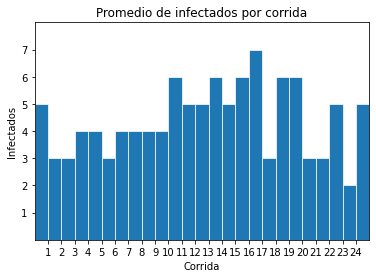

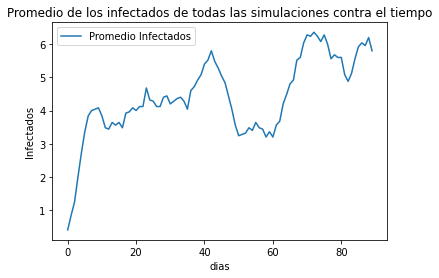

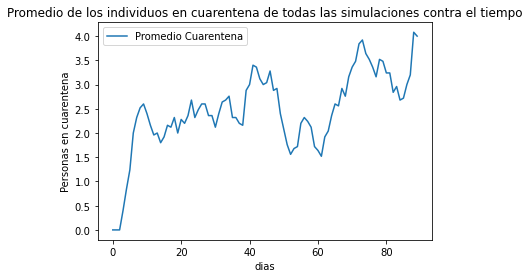

In [218]:
cleanandgraph(E7,7)

Valores utilizados
               Variable Valor
6             inmunidad   180
13  tiempo-recuperacion     7
9        inmunesinicial     0
7         asintomaticos  40.5
Promedio total=
4


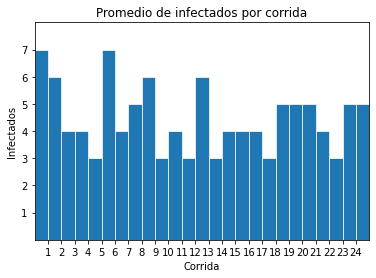

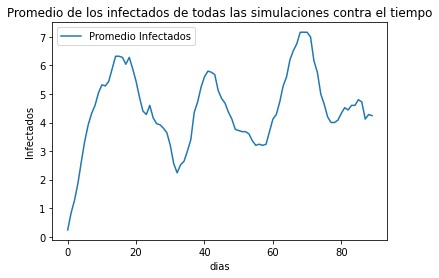

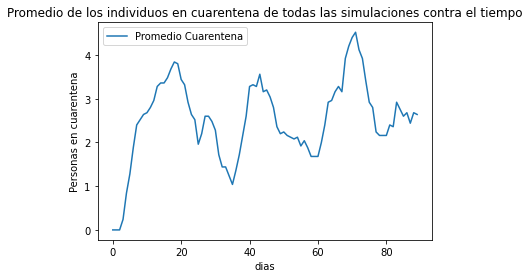

In [17]:
cleanandgraph(E8,8)

Valores utilizados
               Variable Valor
6             inmunidad    40
13  tiempo-recuperacion     7
9        inmunesinicial    15
7         asintomaticos    30
Promedio total=
5


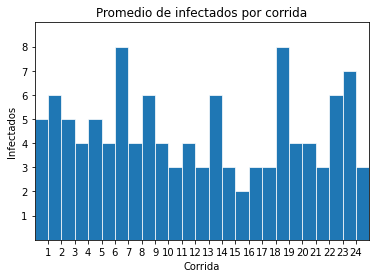

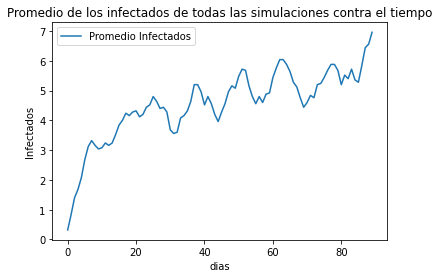

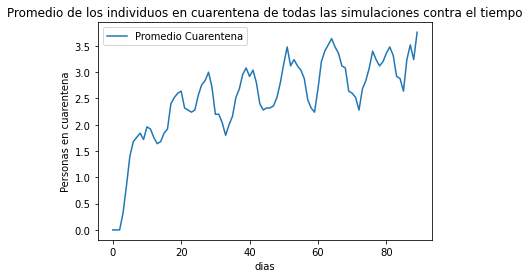

In [18]:
cleanandgraph(E11,11)

Valores utilizados
               Variable Valor
6             inmunidad   120
13  tiempo-recuperacion     7
9        inmunesinicial    15
7         asintomaticos    30
Promedio total=
3


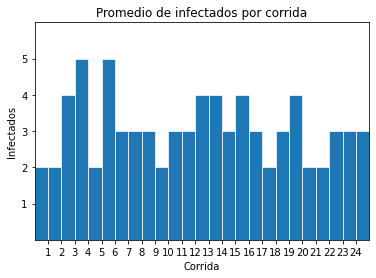

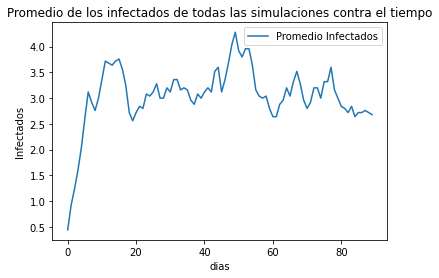

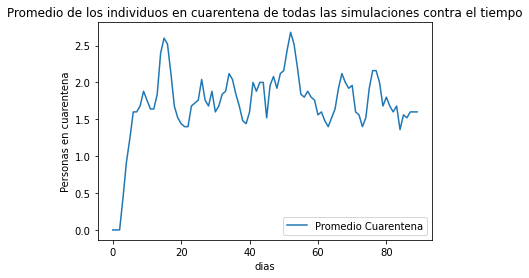

In [19]:
cleanandgraph(E12,12)

Valores utilizados
               Variable Valor
6             inmunidad    40
13  tiempo-recuperacion     4
9        inmunesinicial    30
7         asintomaticos    30
Promedio total=
2


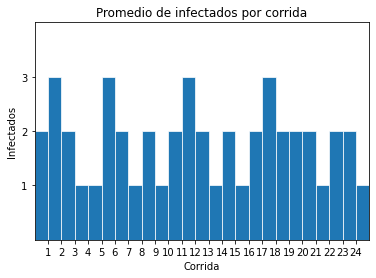

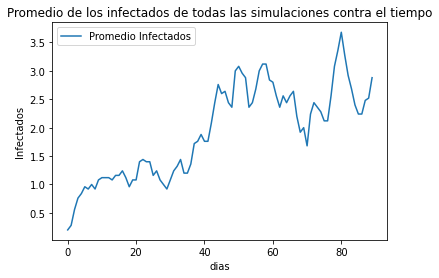

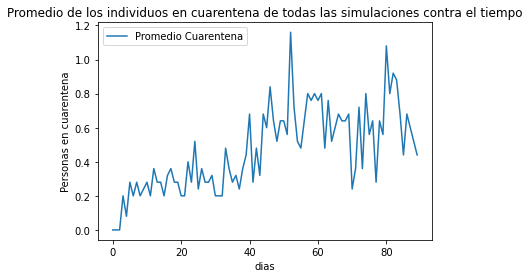

In [20]:
cleanandgraph(E13,13)

Valores utilizados
               Variable Valor
6             inmunidad   120
13  tiempo-recuperacion     4
9        inmunesinicial    30
7         asintomaticos    30
Promedio total=
1


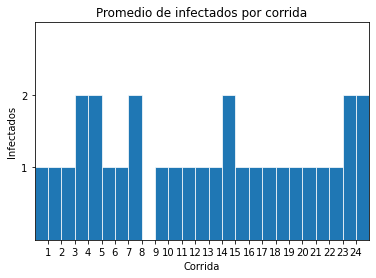

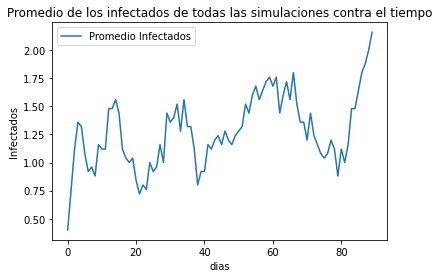

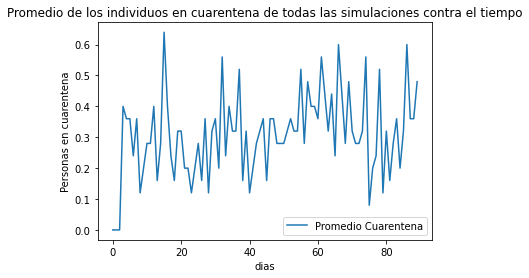

In [21]:
cleanandgraph(E14,14)

Valores utilizados
               Variable Valor
6             inmunidad    40
13  tiempo-recuperacion     7
9        inmunesinicial    30
7         asintomaticos    30
Promedio total=
4


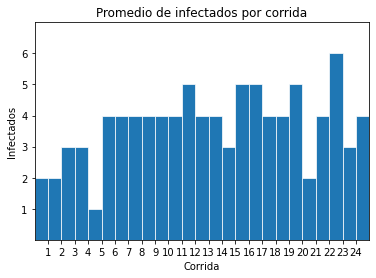

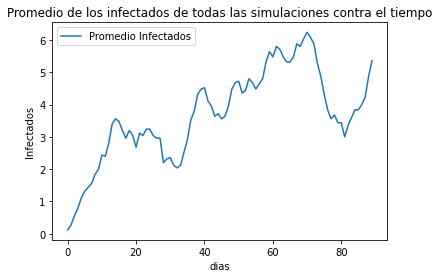

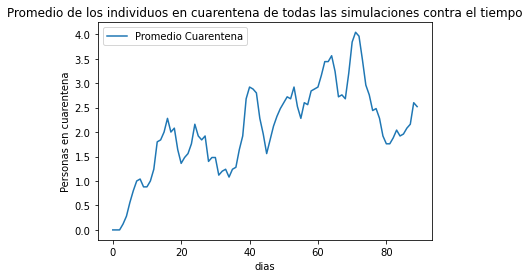

In [22]:
cleanandgraph(E15,15)

Valores utilizados
               Variable Valor
6             inmunidad   120
13  tiempo-recuperacion     7
9        inmunesinicial    30
7         asintomaticos    30
Promedio total=
2


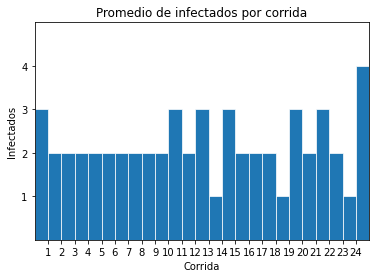

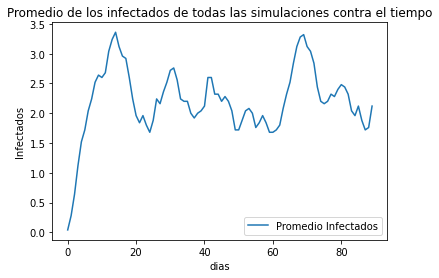

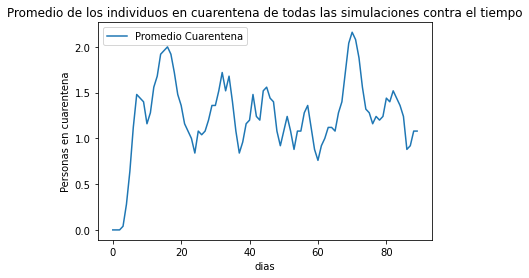

In [23]:
cleanandgraph(E16,16)

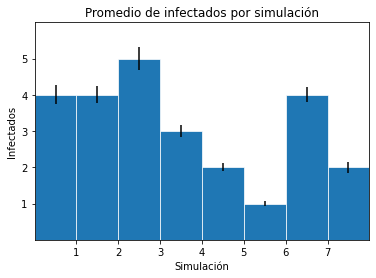

In [25]:
ExpList=[E7,E8,E11,E12,E13,E14,E15,E16]
GML=[None]*len(ExpList)
SEM=[None]*len(ExpList)
i=0
for exp in ExpList:
    GML[i],SEM[i]=GM(exp)
    i+=1
    
x=0.5+np.arange(8) 

fig, ax = plt.subplots()
ax.bar(x, GML,yerr=SEM, width=1, edgecolor="white", linewidth=0.7)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
ylim=(0, max(GML)+1), yticks=np.arange(1, max(GML)+1))
ax.set_title('Promedio de infectados por simulación')
ax.set_ylabel("Infectados")
ax.set_xlabel("Simulación")
plt.show()

[4.915779175502541, 36.38981026216648, 14.930210853847296, 43.76419970848367]


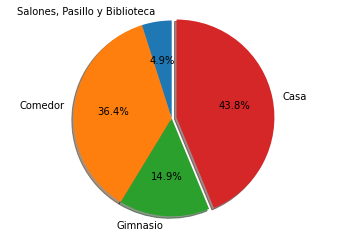

7
[4.649559875133072, 39.778196035850996, 16.9269423790454, 38.64530170997053]


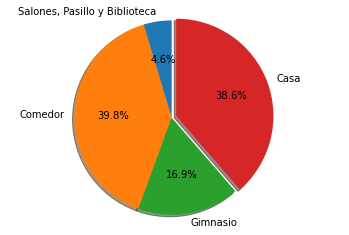

8
[4.827902934204948, 38.44207794634744, 13.868607347897274, 42.861411771550344]


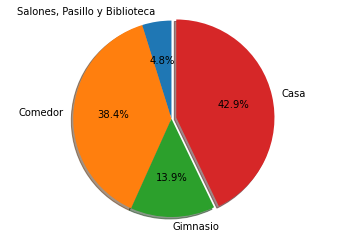

11
[3.2384084090414076, 34.000009368361646, 12.588384636823768, 50.17319758577319]


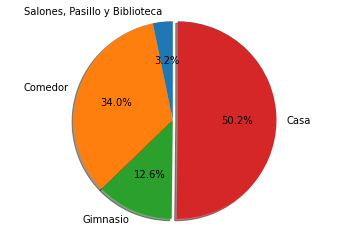

12
[3.65925802988974, 32.64863895410002, 13.04604454818738, 50.64605846782286]


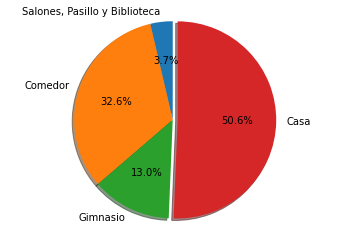

13
[3.346757079865354, 31.435703709943425, 11.005906232484602, 54.211632977706614]


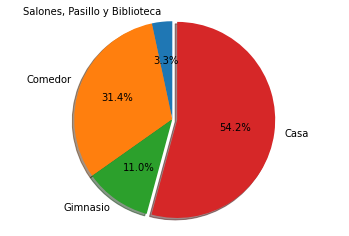

14
[3.4692950188254637, 40.773683299433074, 13.91688665772278, 41.84013502401868]


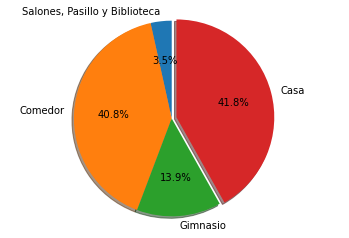

15
[4.881258224199515, 31.029360296736, 12.315246844429094, 51.77413463463538]


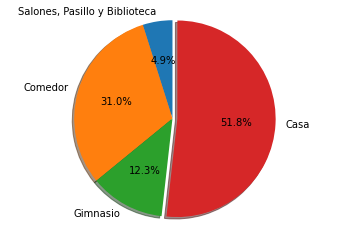

16


In [26]:
ubicaciones(E7)
print("7")
ubicaciones(E8)
print("8")
ubicaciones(E11)
print("11")
ubicaciones(E12)
print("12")
ubicaciones(E13)
print("13")
ubicaciones(E14)
print("14")
ubicaciones(E15)
print("15")
ubicaciones(E16)
print("16")